# Dataset
Exoplanet dataset is retrieved from http://exoplanetarchive.ipac.caltech.edu on Sun Feb 26 04:31:47 2023 West Standard Time. They are:
- Confirmed exoplanets: 5272 rows, 92 columns
- Planet emission spectrum: 574 rows, 14 columns
- Planet transit spectrum: 5745 rows, 22 columns

Depending on models used in later analysis, some columns are subject to be dropped or cleaned. But we keep all columns for now in case
for new models. The following analysis is based on the confirmed exoplanets dataset. 

# Variables 
| Variable | Description | Unit |
| --- | --- | --- |
| pl_name | Planet Name |  |
| hostname | Host Name |  |
| default_flag | Default Parameter Set |  |
| sy_snum | Number of Stars |  |
| sy_pnum | Number of Planets |  |
| discoverymethod | Discovery Method |  |
| disc_year | Discovery Year |  |
| disc_facility | Discovery Facility |  |
| soltype | Solution Type |  |
| pl_controv_flag | Controversial Flag |  |
| pl_refname | Planetary Parameter Reference |  |
| pl_orbper | Orbital Period | days |
| pl_orbpererr1 | Orbital Period Upper Unc. | days |
| pl_orbpererr2 | Orbital Period Lower Unc. | days |
| pl_orbperlim | Orbital Period Limit Flag |  |
| pl_orbsmax | Orbit Semi-Major Axis | au |
| pl_orbsmaxerr1 | Orbit Semi-Major Axis Upper Unc. | au |
| pl_orbsmaxerr2 | Orbit Semi-Major Axis Lower Unc. | au |
| pl_orbsmaxlim | Orbit Semi-Major Axis Limit Flag |  |
| pl_rade | Planet Radius | Earth Radius |
| pl_radeerr1 | Planet Radius Upper Unc. | Earth Radius |
| pl_radeerr2 | Planet Radius Lower Unc. | Earth Radius |
| pl_radelim | Planet Radius Limit Flag |  |
| pl_radj | Planet Radius | Jupiter Radius |
| pl_radjerr1 | Planet Radius Upper Unc. | Jupiter Radius |
| pl_radjerr2 | Planet Radius Lower Unc. | Jupiter Radius |
| pl_radjlim | Planet Radius Limit Flag |  |
| pl_bmasse | Planet Mass or Mass*sin(i) | Earth Mass |
| pl_bmasseerr1 | Planet Mass or Mass*sin(i) Upper Unc. | Earth Mass |
| pl_bmasseerr2 | Planet Mass or Mass*sin(i) Lower Unc. | Earth Mass |
| pl_bmasselim | Planet Mass or Mass*sin(i) Limit Flag | Earth Mass |
| pl_bmassj | Planet Mass or Mass*sin(i) | Jupiter Mass |
| pl_bmassjerr1 | Planet Mass or Mass*sin(i) Upper Unc. | Jupiter Mass |
| pl_bmassjerr2 | Planet Mass or Mass*sin(i) Lower Unc. | Jupiter Mass |
| pl_bmassjlim | Planet Mass or Mass*sin(i) Limit Flag | Jupiter Mass |
| pl_bmassprov | Planet Mass or Mass*sin(i) Provenance |  |
| pl_orbeccen | Eccentricity |  |
| pl_orbeccenerr1 | Eccentricity Upper Unc. |  |
| pl_orbeccenerr2 | Eccentricity Lower Unc. |  |
| pl_orbeccenlim | Eccentricity Limit Flag |  |
| pl_insol | Insolation Flux | Earth Flux |
| pl_insolerr1 | Insolation Flux Upper Unc. | Earth Flux |
| pl_insolerr2 | Insolation Flux Lower Unc. | Earth Flux |
| pl_insollim | Insolation Flux Limit Flag |  |
| pl_eqt | Equilibrium Temperature | K |
| pl_eqterr1 | Equilibrium Temperature Upper Unc. | K |
| pl_eqterr2 | Equilibrium Temperature Lower Unc. | K |
| pl_eqtlim | Equilibrium Temperature Limit Flag |  |

## Missing values analysis

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# import data
df = pd.read_csv('data/confirmed.csv', header=98)

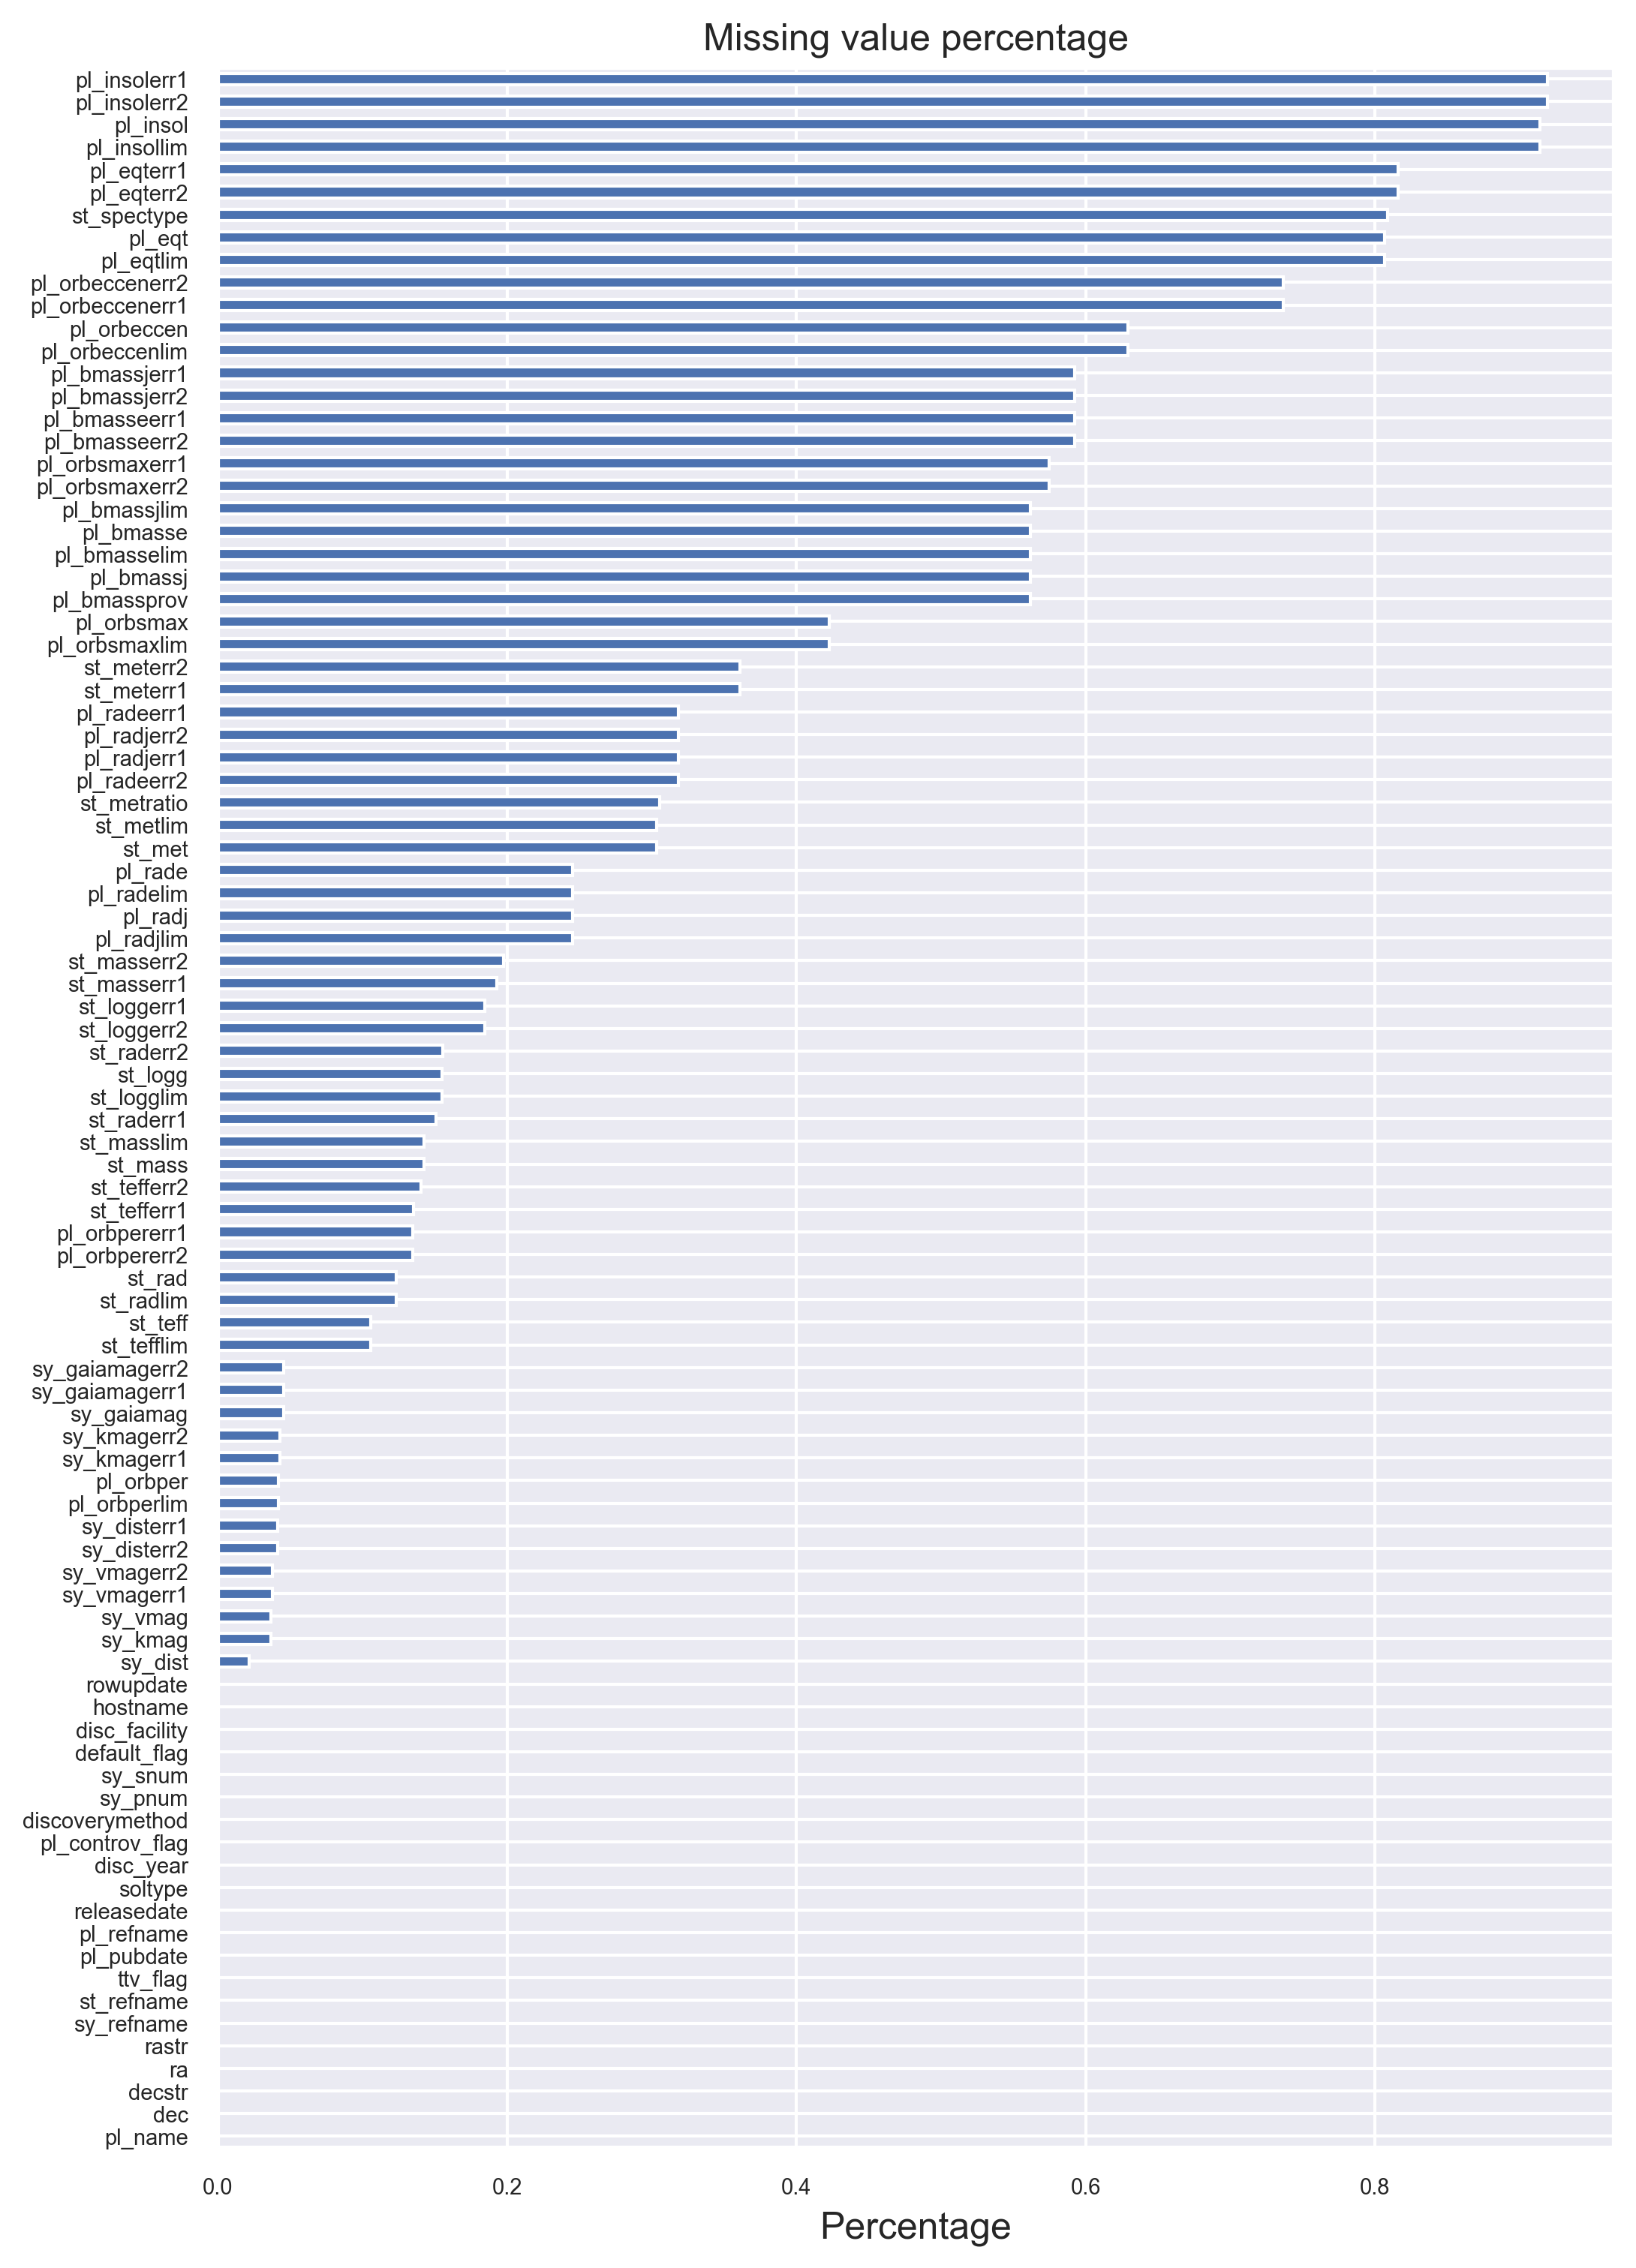

In [54]:
fig, ax = plt.subplots(figsize=(8,12), dpi=300)
(df.isna().sum()/len(df)).sort_values().plot(kind='barh', ax=ax)
ax.set_title('Missing value percentage')
ax.set_xlabel('Percentage')
ax.tick_params(axis='both', which='major', labelsize=7)

## Summary on missing values
Some variables have a high percentage of missing values. We need to be careful when using these variables in later analysis. 

## Distribution of some interesting variables
### Number of host stars

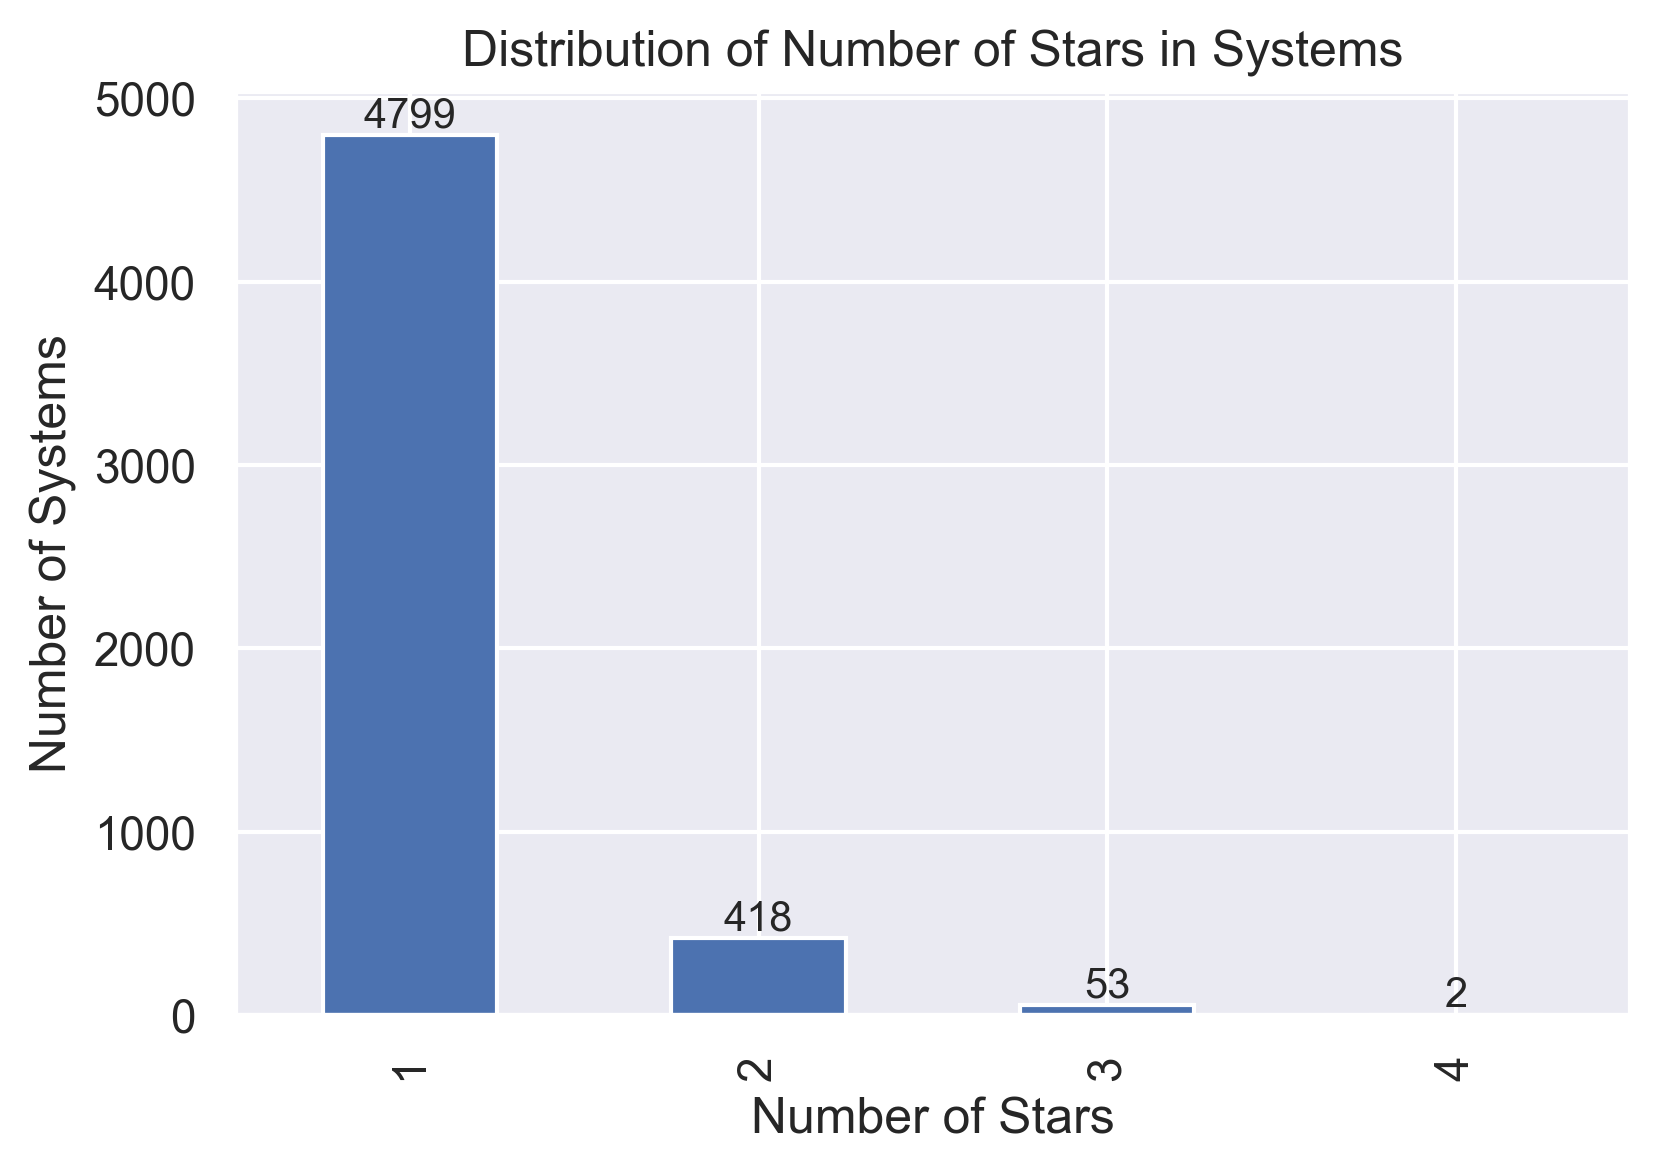

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of stars
ax = df['sy_snum'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Number of Stars')
ax.set_ylabel('Number of Systems')
ax.set_title('Distribution of Number of Stars in Systems')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

As expected, Unary star system is most common in the exoplanet dataset, followed by binary and trinary star system.
### Number of planets

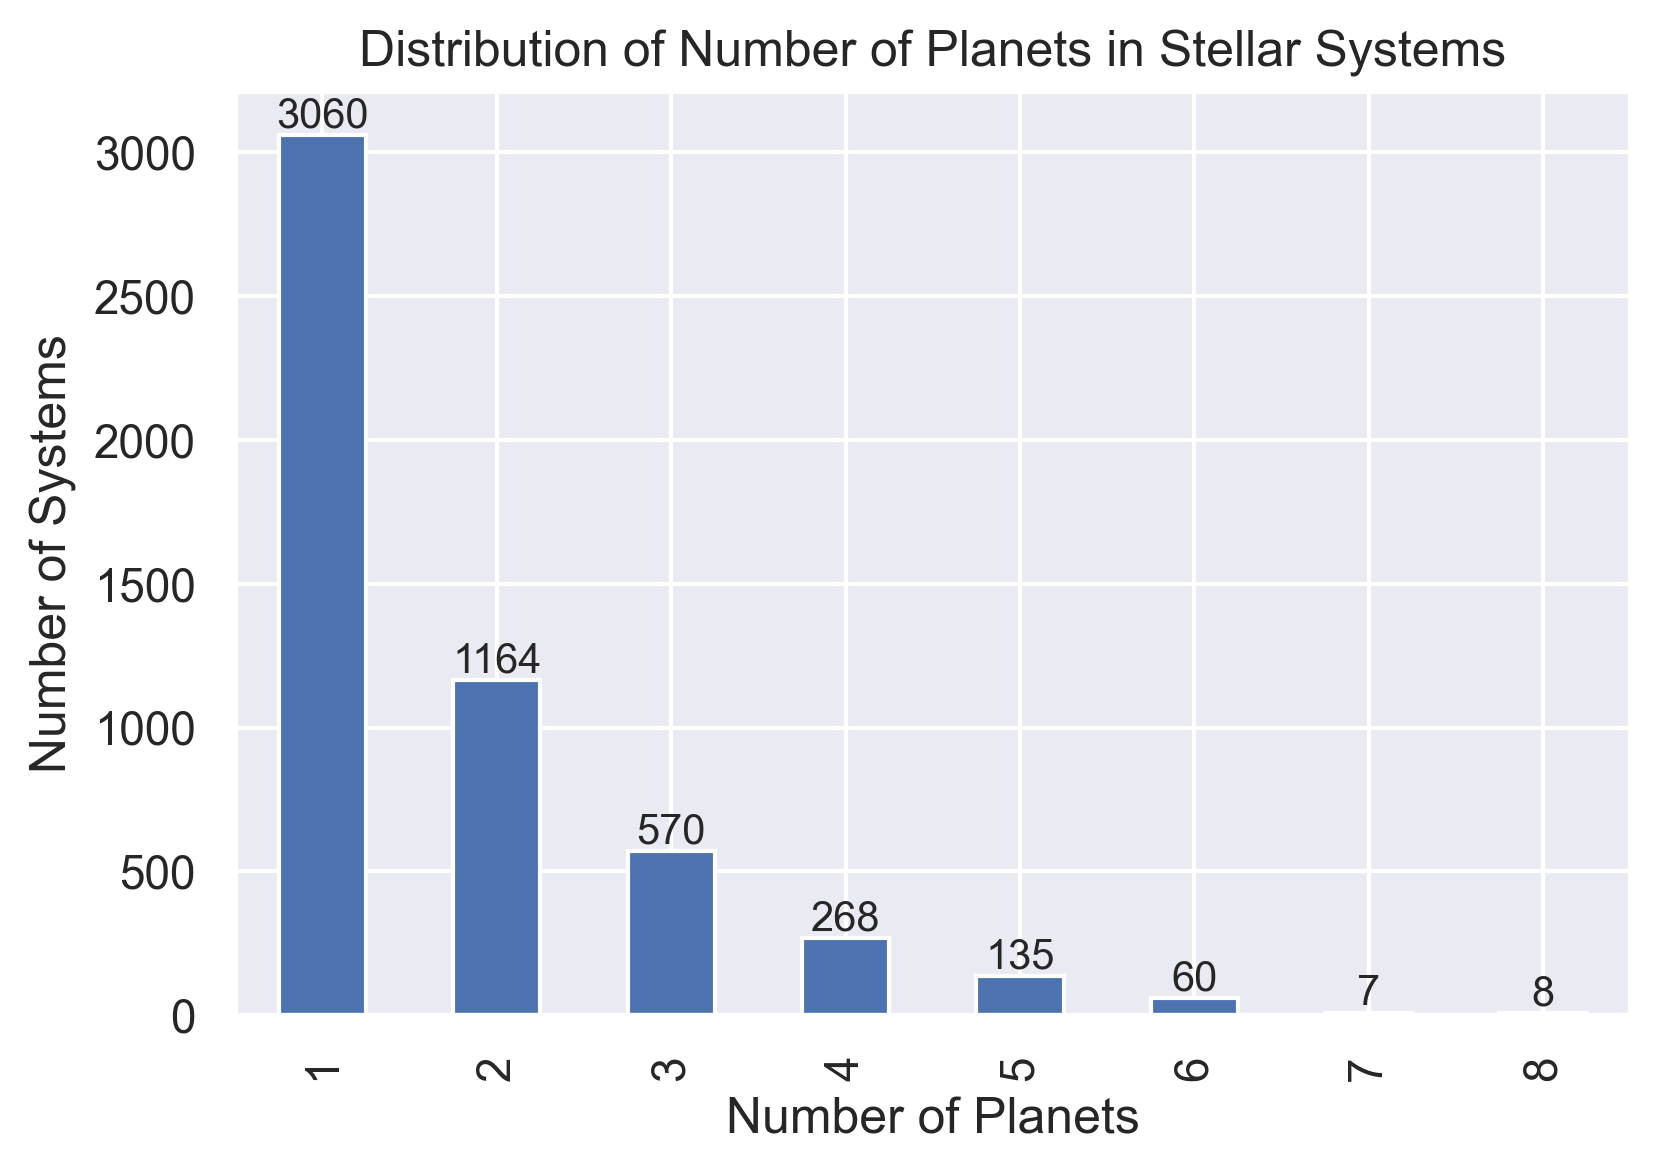

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of planets.
ax = df['sy_pnum'].value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_xlabel('Number of Planets')
ax.set_ylabel('Number of Systems')
ax.set_title('Distribution of Number of Planets in Stellar Systems')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)


Text(0, 0.5, 'Percentage')

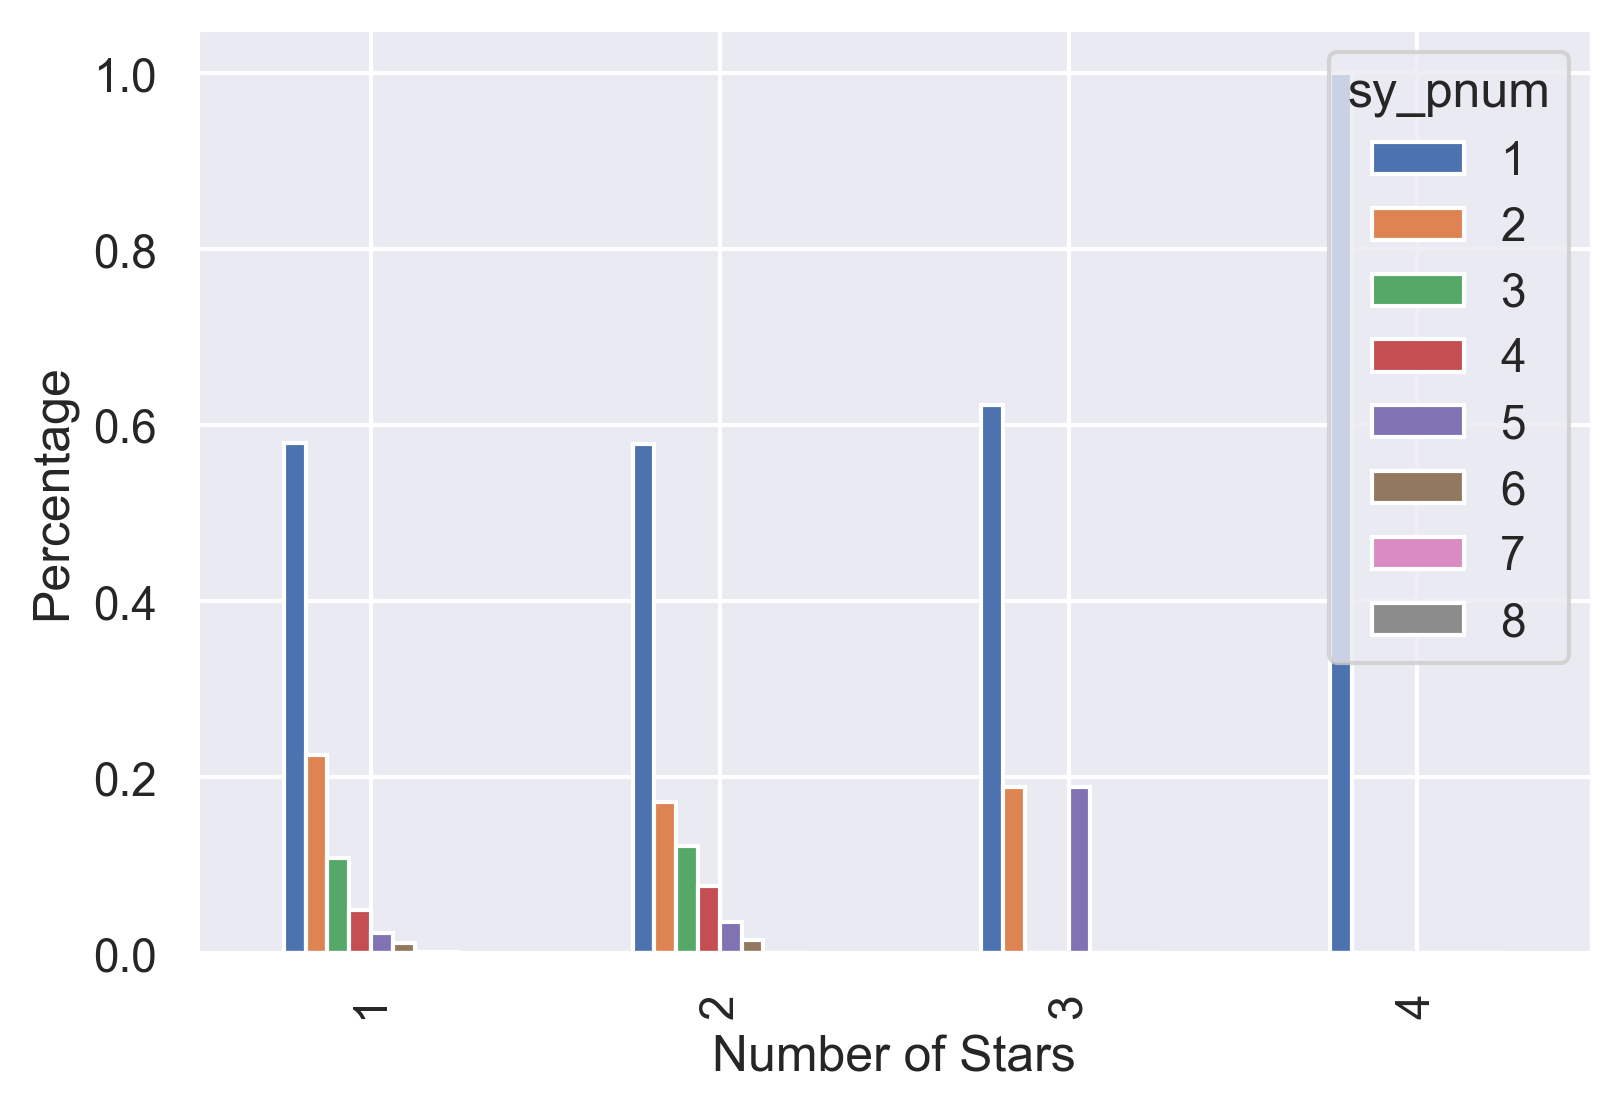

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of planets unary and binary systems y-axis is percentage
df.groupby('sy_snum')['sy_pnum'].value_counts(normalize=True).unstack().plot(kind='bar', ax=ax)

ax.set_xlabel('Number of Stars')
ax.set_ylabel('Percentage')

For the unary and binary star system, number of planets seem to follow the same distribution. But it seems that higher order stellar system tend to have fewer planets. But it could also be attributed to less data for higher order stellar systems (`53` trinary systems and only `2` quadruple star systems). 
### Mass of planets

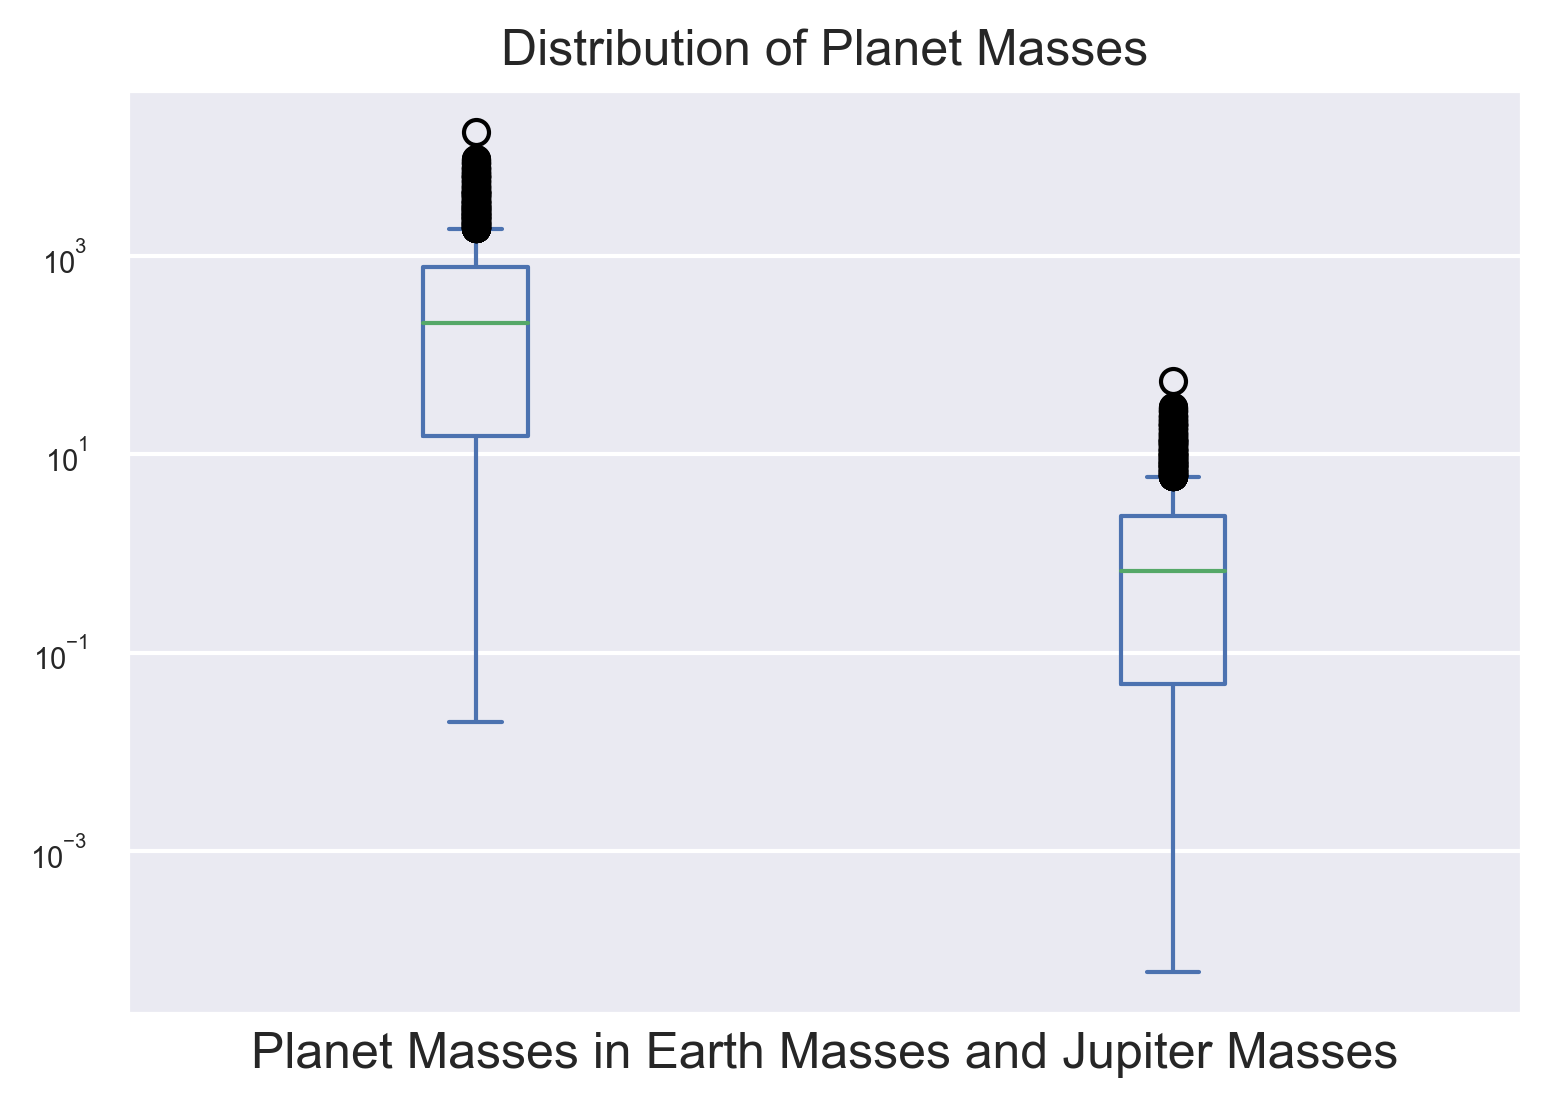

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# plot box plot of mass distribution of planets
ax = df[['pl_bmasse','pl_bmassj']].plot(kind='box', ax=ax)
ax.set_title('Distribution of Planet Masses')
ax.set_xlabel('Planet Masses in Earth Masses and Jupiter Masses')
ax.set_yscale('log')
ax.set_xticks([])
ax.tick_params(axis='both', which='major', labelsize=7)

## Variable dependency analysis
### Bias of discovery methods

Text(0.5, 1.0, 'Bias of discovery methods')

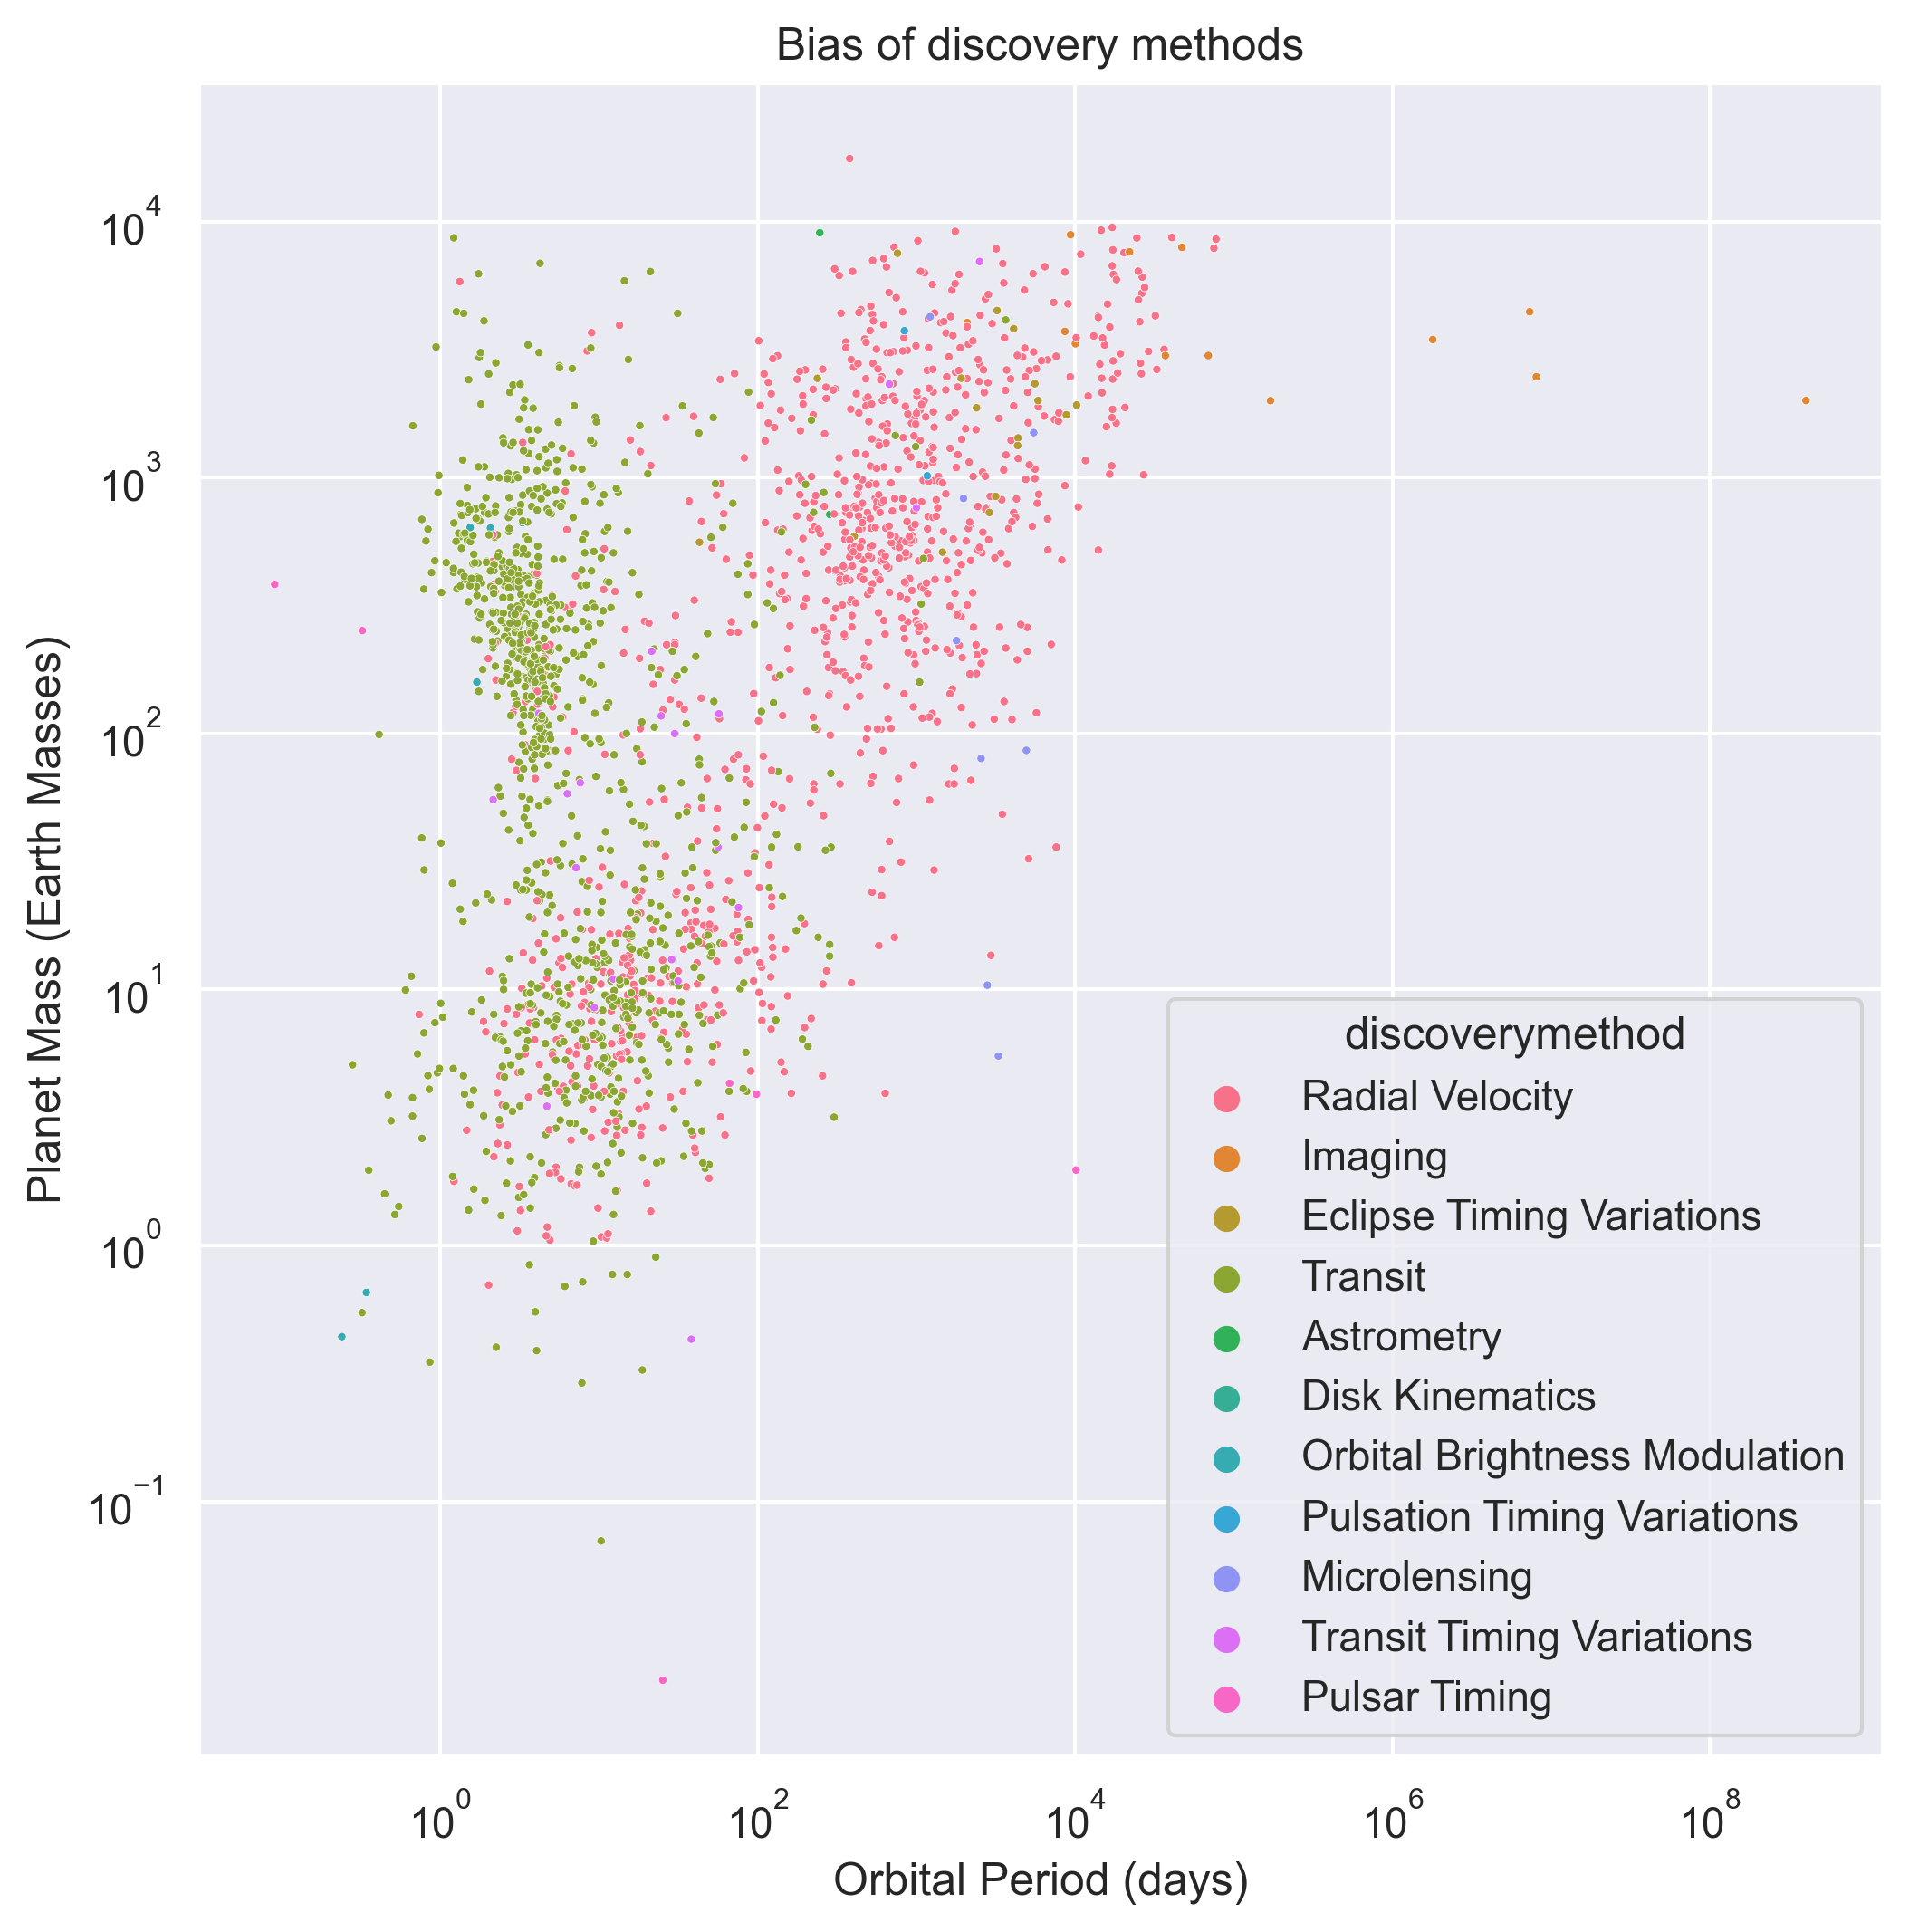

In [59]:
# scatter plot of planet mass vs planet periods with discovery method as hue 
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
sns.scatterplot(data=df, x='pl_orbper', y='pl_bmasse', hue='discoverymethod', ax=ax, s=5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Planet Mass (Earth Masses)')
ax.set_title('Bias of discovery methods')

Dominant discovery methods include transit, radial velocity and microlensing. But those methods are not equally biased towards different types of planets. From the scatterplot, we can see transit has bias 
- On planets with short periods and small semi-major axes because they transit their host star more frequently.
- On larger planets are more likely to be detected since they block more light.
- On planets whose orbital planes pass earth. Otherwise transit would not be observed.

Radial velocity has bias
- On massive planets that are close to host stars.
- On planets whose orbital plane close to the earth. The constraint on orbital plane is less strict than transit method.

Micro-lensing has bias 
- On massive planets bc massive planets have stronger lensing effect
- On planets distant from host stars (Complementary to transit and radial velocity methods)
- On planets with specific orbital period, orientation and eccentricity because lensing effect is strongest when the planet resides in the middle between background starlight and the earth

### Planet type 

In [60]:
planet_type = pd.read_csv('data/cleaned_5250.csv')['planet_type']

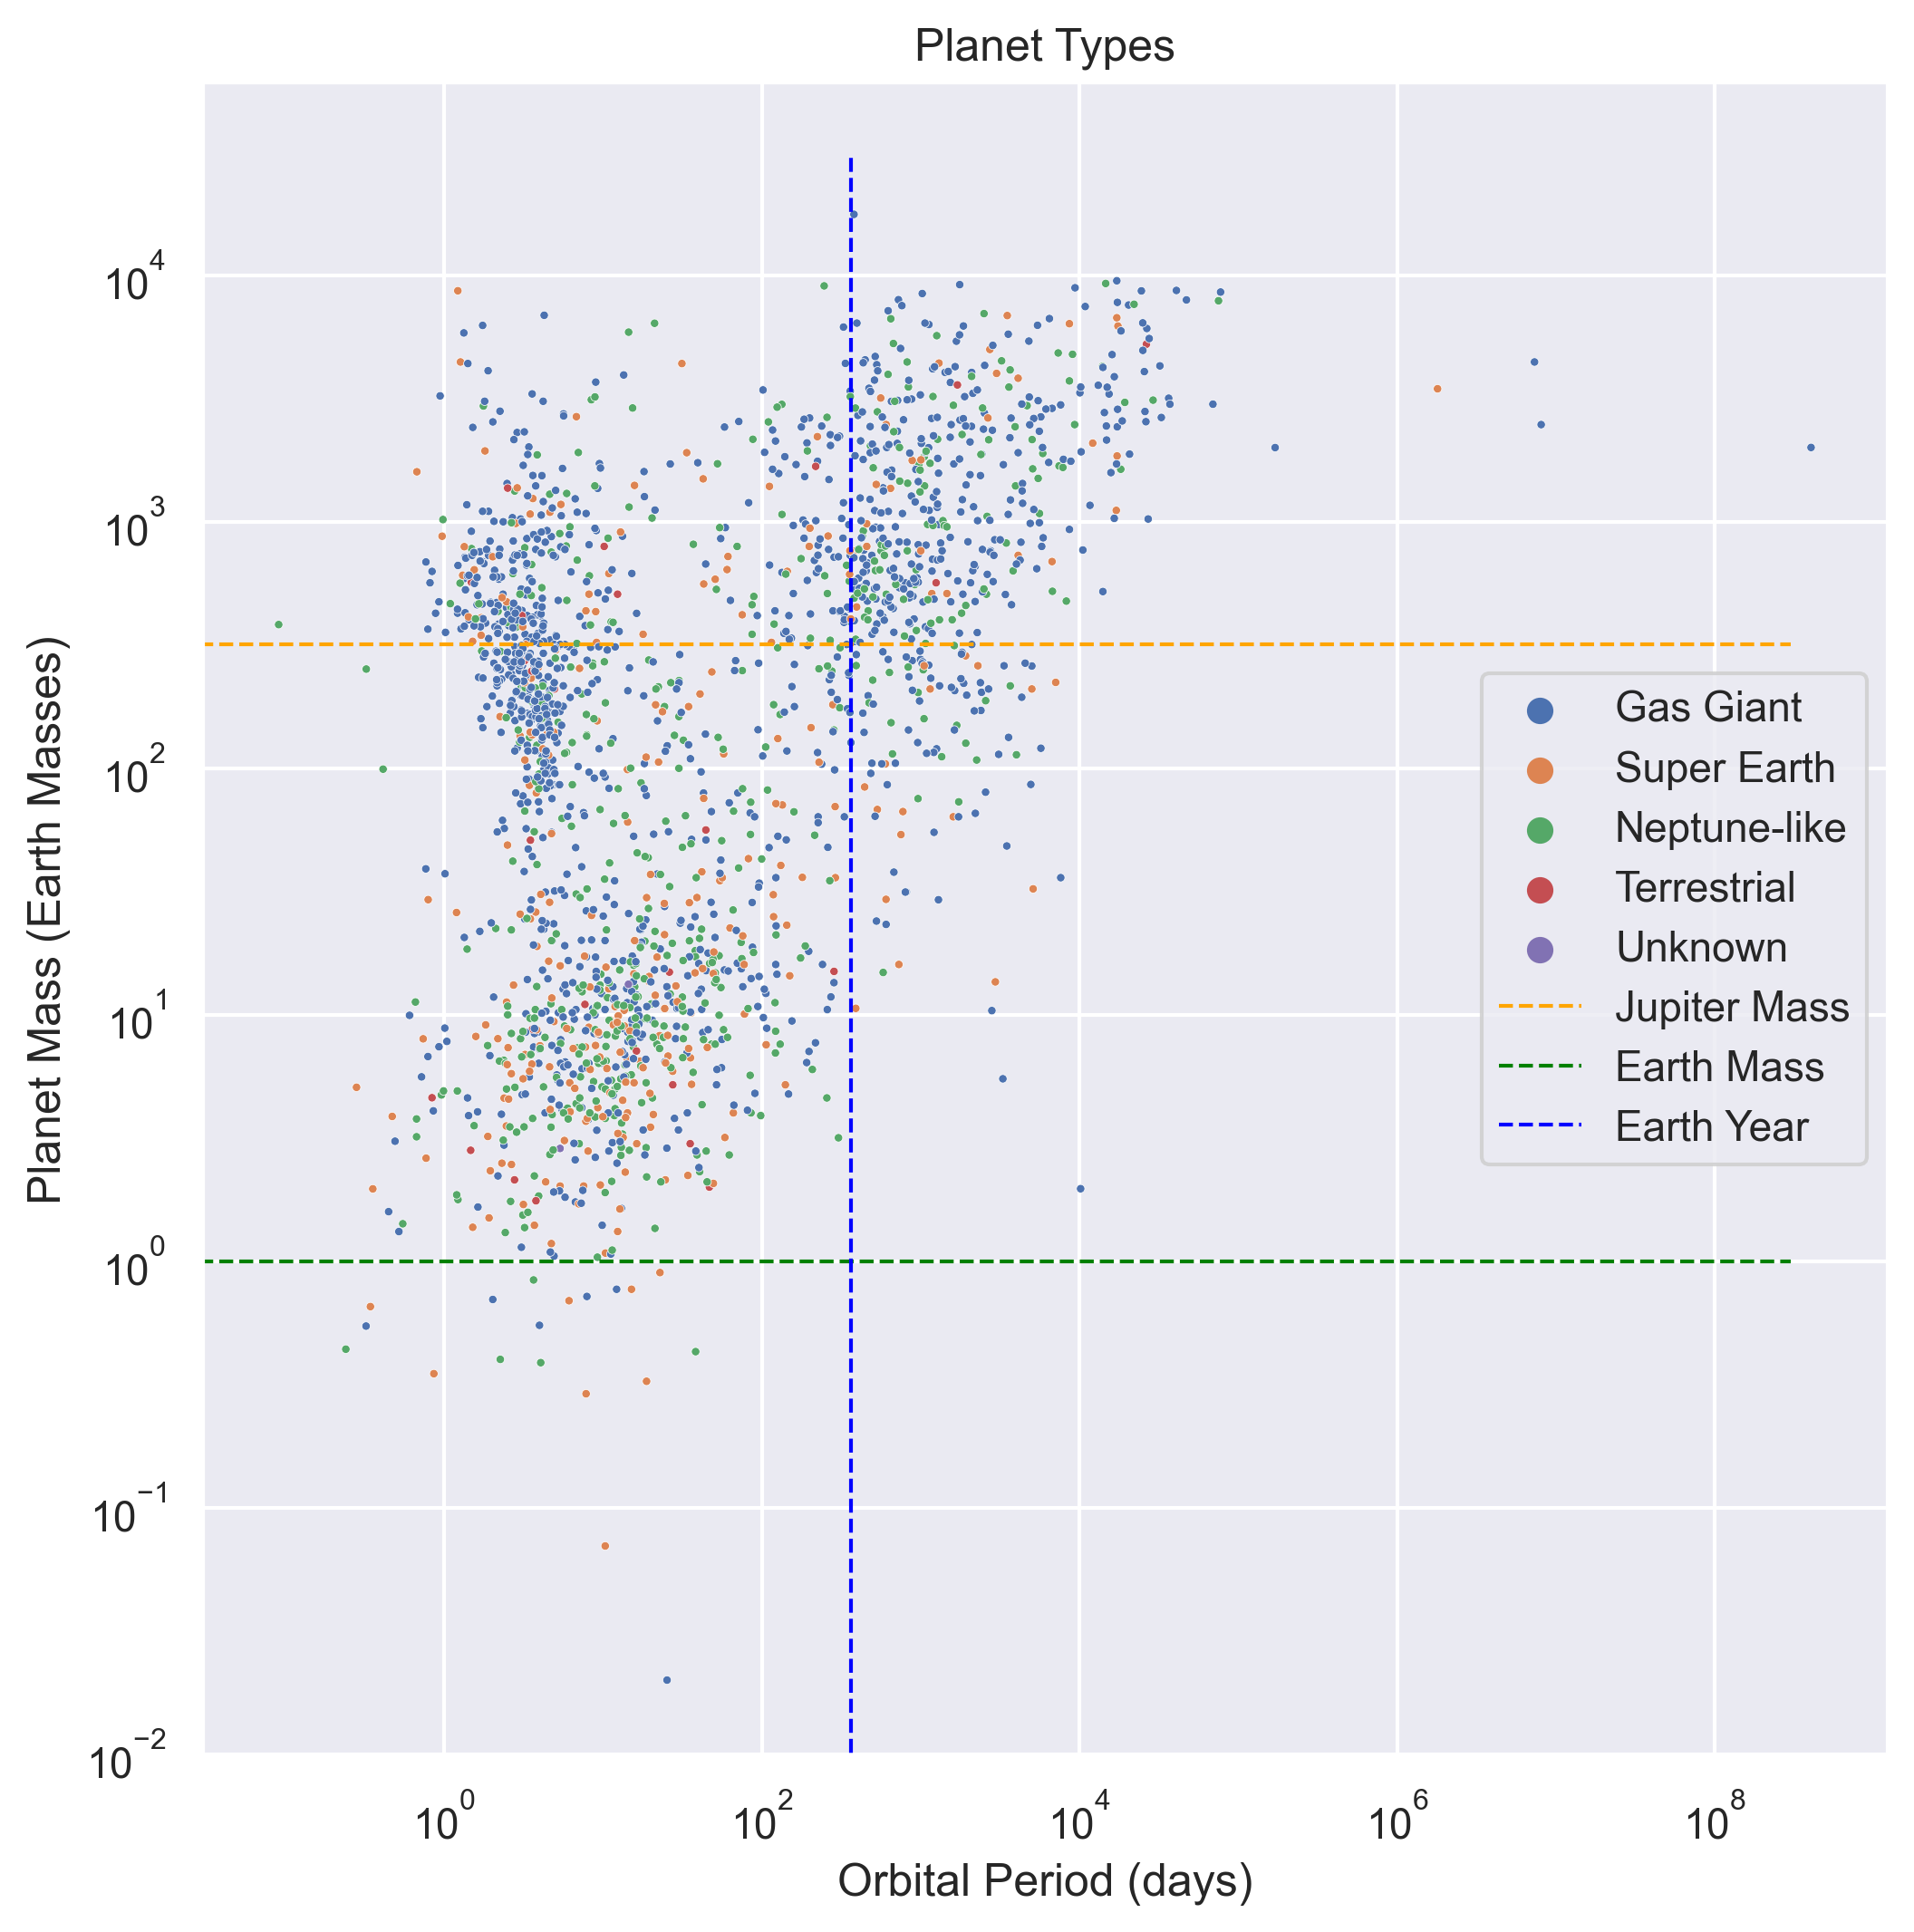

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
sns.scatterplot(data=df, x='pl_orbper', y='pl_bmasse', hue=planet_type, ax=ax, s=5)
ax.plot([0, 3e8], [318, 318], color='orange', linestyle='--', linewidth=1, label='Jupiter Mass')
ax.plot([0, 3e8], [1, 1], color='green', linestyle='--', linewidth=1, label='Earth Mass')
ax.plot([365.25, 365.25], [0, 3e4], color='blue', linestyle='--', linewidth=1, label='Earth Year')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Planet Mass (Earth Masses)')
ax.set_title('Planet Types')
ax.legend()

There are several counter-intuitive findings from the scatterplot:
- Hot Jupiters are common. 
- Earth-like planets are much rarer than super-earths.  
- Most planets have less period than earth-year. 

The above findings are contradictory to our solar system. This could be result of the bias of discovery methods or the fact that Hot Jupiters are common and Earth-like planets are indeed rare in the universe.

### Discovery year 

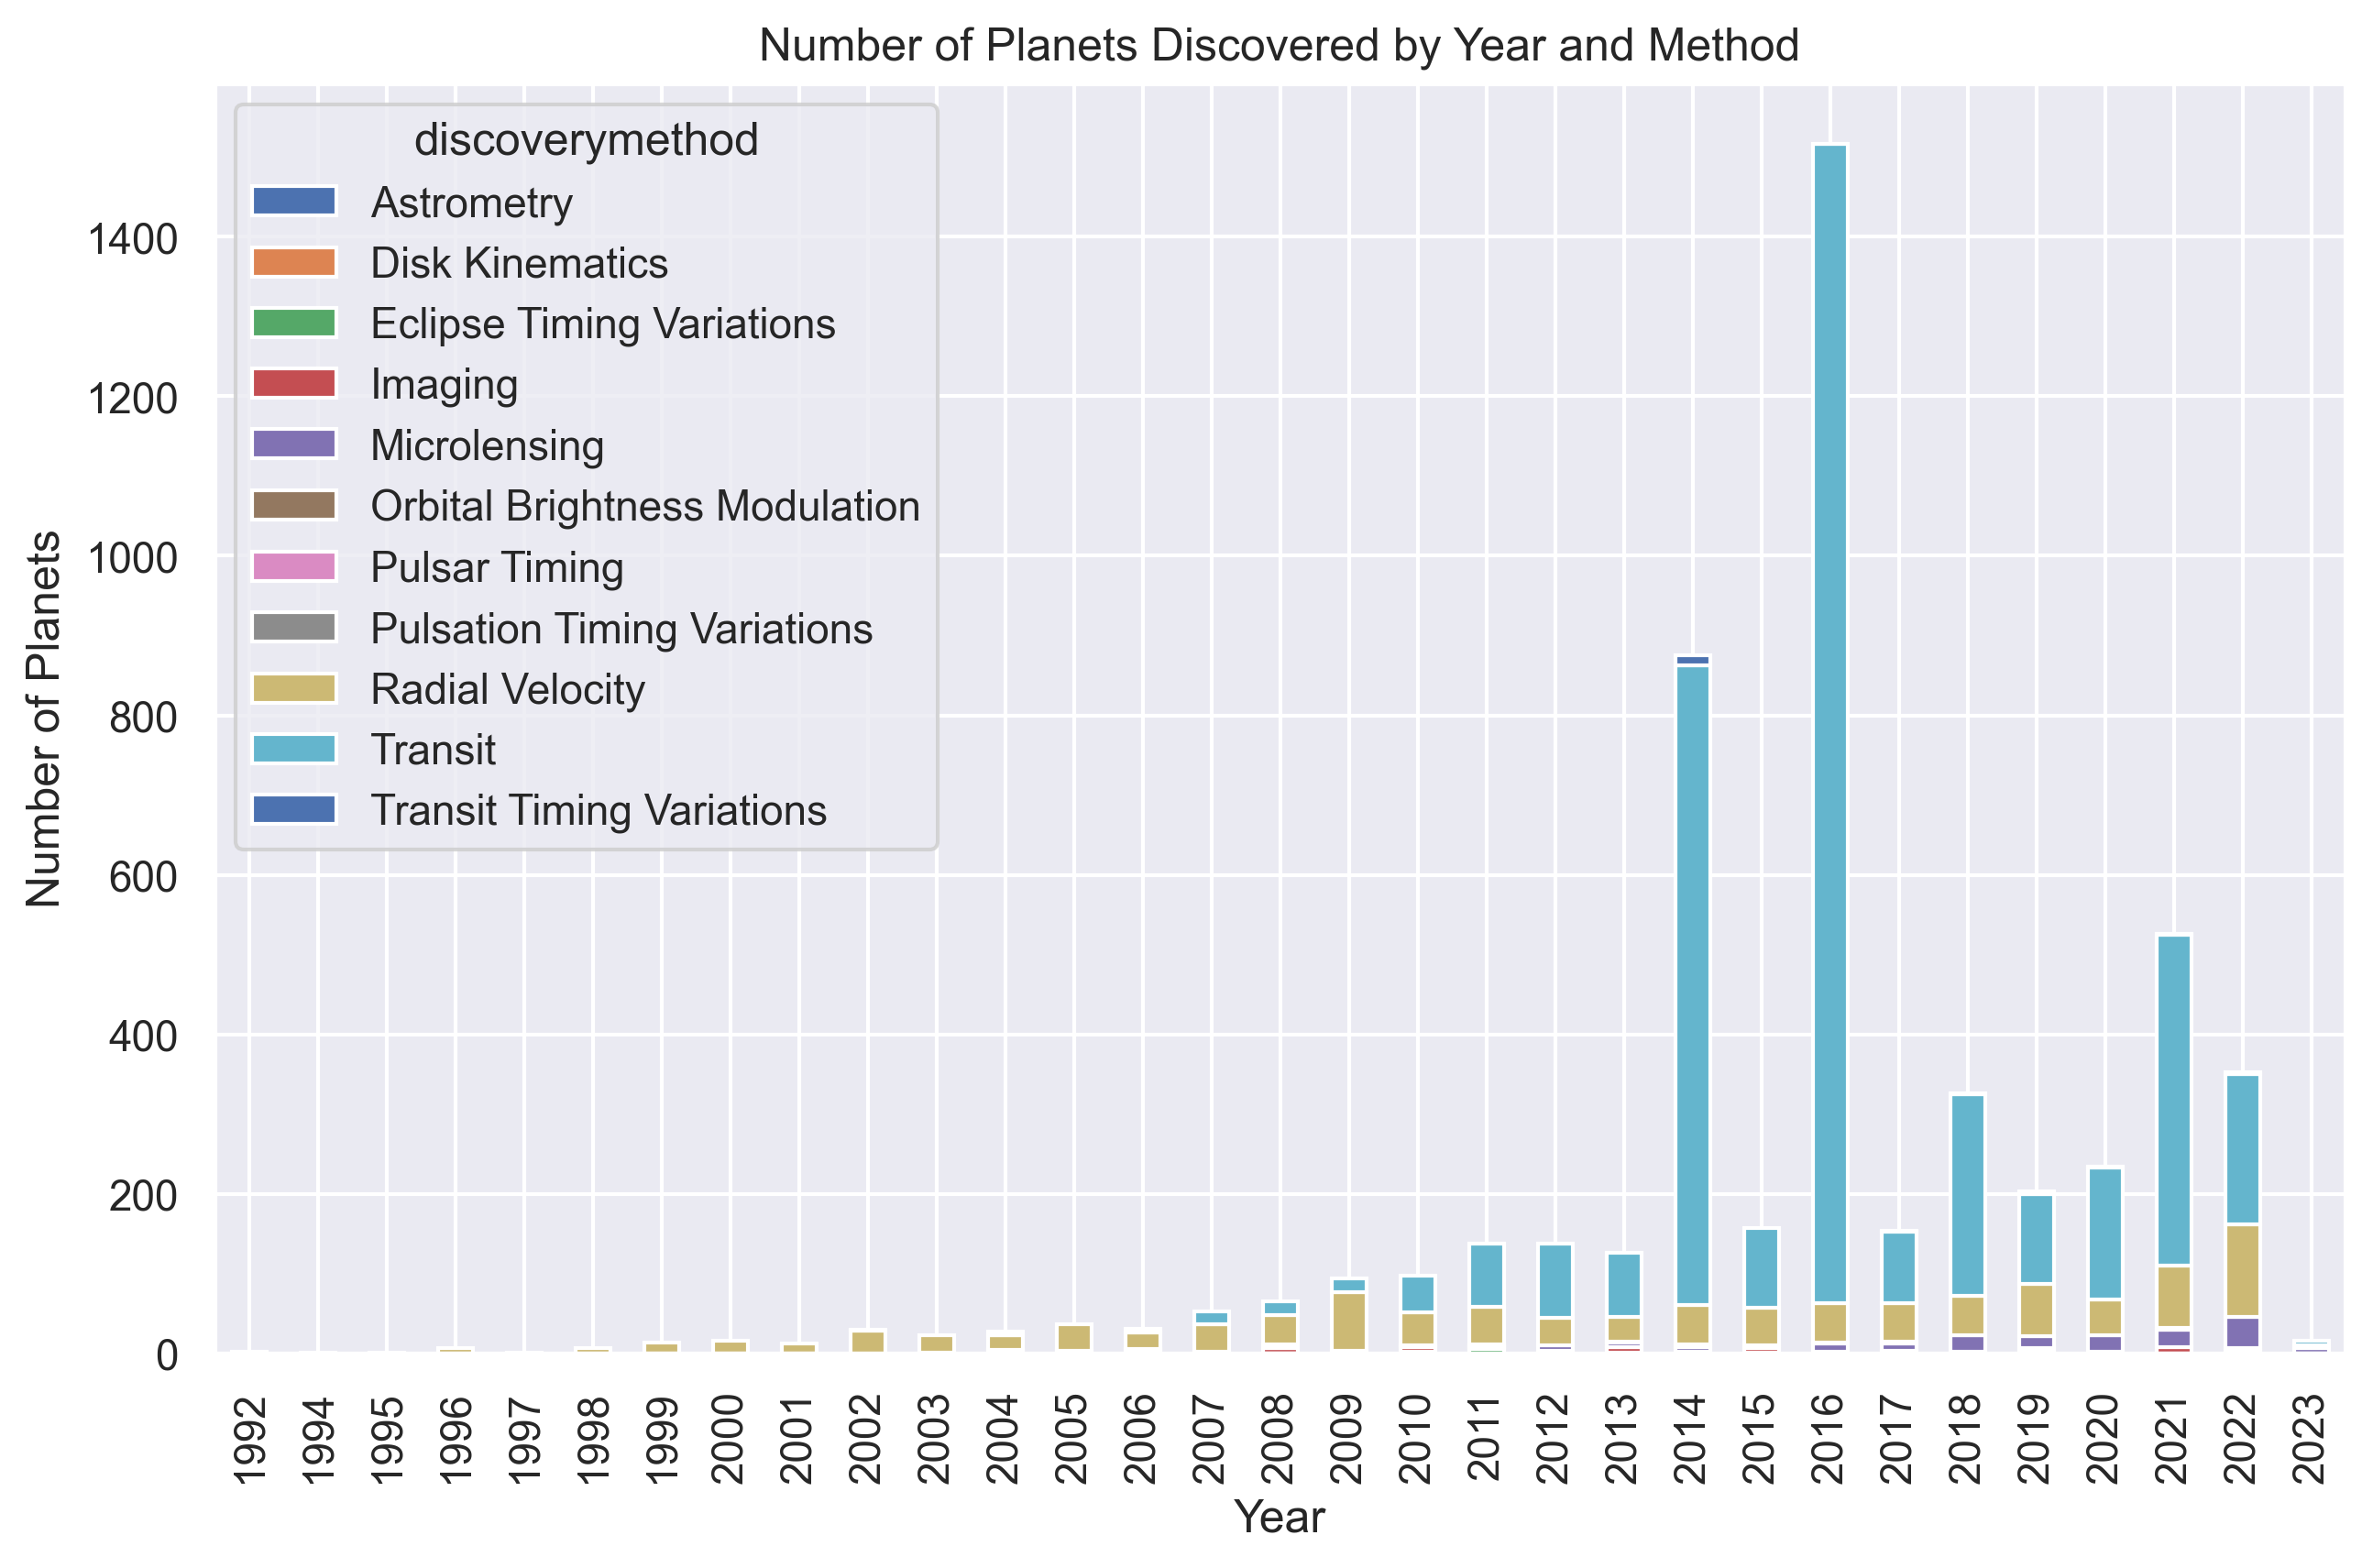

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
# create the countplot  
df.value_counts(['disc_year', 'discoverymethod']).unstack().plot(kind='bar', figsize=(10, 6), stacked=True, ax=ax)

# set the title and x/y-axis labels
ax.set_title('Number of Planets Discovered by Year and Method')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Planets')

# rotate x-axis tick labels to avoid overlapping
ax.tick_params(axis='x', rotation=90)

# display the plot
plt.show()